# Week 11 Assignment - Custom Functions and Plotting

Write a function that will read in this week's county-level covid data ("covidData_4.7.20.csv") and create a line plot showing increases in cumulative case counts or deaths through time for  a particular state. The line plot should have labeled axes and a grid.

The function should accept two arguments. The first argument should be the name of the state. The second should indicate whether the user wants to plot case counts or deaths (defaulting to case counts). You will need to write a second function that calculates the case counts per state per day, summing across counties/parishes.

As always, remember to document your code, including docstrings for functions.

NOTE 1: One thing that tripped me up initially - not all counties/parishes have fips codes in this dataset. So that field may be empty for some lines in the file.

NOTE 2: Remember that when you first read from a file, everything is considered a string. To get proper plots, you'll need to convert numbers stored as strings to actual numbers.

In [29]:
# Import needed modules here

import re
import matplotlib.pyplot as plt
import numpy as np
import copy

In [30]:
def stateData(state,data = "cases"):
    """This function will be able to read this week's county-level covid-19 data and construct variables to create a line plot"""
    covidData = open("covidData_4.7.20.csv","r") #opens the county-level covid data
    dataCases = {}
    dataDeaths = {}
    #for loop will count every case and death for every state due to covid-19
    for i in covidData:
        if state in i:
              date, county, state, fips, cases, deaths = i.split(",")
              if data == "cases":
                  case = int(cases)#integer providing total cases
                  if date in dataCases:
                      dataCases[date] += case
                  else:
                      dataCases[date] = case
              elif data == "deaths":
                  death = int(deaths)#integer providing total deaths
                  if date in dataDeaths:
                      dataDeaths[date] += death
                  else:
                      dataDeaths[date] = death
    covidData.close()
    xVar = []# this code will generate the x variable
    yVar = []# this code will generate the y variable
    #code assigning the x and y variables to specific data
    xVar = list(dataCases.keys())
    if data == "cases":
        yVar = list(dataCases.values())
    elif data == "deaths":
        yVar = list(dataDeaths.values())
    return xVar, yVar #return coordinate/plot

Enter a state: New Jersey
Enter cases or deaths: cases


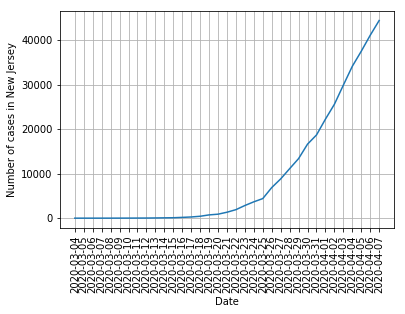

In [31]:
# Use your function to create a plot here
stateInput = input("Enter a state: ") #code allows for any state to be entered
dataInput = input("Enter cases or deaths: ") #code that will enter the cases or deaths for the state
xaxis, yaxis = stateData(state = stateInput, data = dataInput) #this code shows the data to be entered for the x and y variables
#codes below will set up plot and label specific parts of the plot
plt.figure()
plt.xlabel("Date") #what will show on the x axis
plt.ylabel("Number of {} in {}".format(dataInput,stateInput))#what will show on the y axis
plt.xticks(rotation=90) #coding for 90 degree rotation of x axis
plt.grid(True) #code for adding a grid
plt.plot(xaxis, yaxis)
plt.show()#code to display plot

Write a second function that is similar to the first, but shows increases in cumulative case counts or deaths through time for a particular county/parish in a particular state.

The function should accept three arguments. The first argument should be the name of the county/parish. The second should be the name of the state. The third should indicate whether the user wants to plot case counts or deaths (defaulting to case counts).

As always, remember to document your code, including docstrings for functions.

In [32]:
# Your code here
def countyData(county,state,data = "cases"):
    """This function will be able to read this week's county-level covid-19 data and construct variables to create a line plot for each county in each state"""
    covidData = open("covidData_4.7.20.csv","r") #opens the county-level covid data
    dataCases = {}
    dataDeaths = {}
    #for loop will count every case and death for each county in every state due to covid-19
    for i in covidData:
        if county in i and state in i:
              date, county, state, fips, cases, deaths = i.split(",")
              if data == "cases":
                  case = int(cases)#integer for cases
                  if date in dataCases: #providing total cases
                      dataCases[date] += case
                  else:
                      dataCases[date] = case
              elif data == "deaths":
                  death = int(deaths)#integer for deaths
                  if date in dataDeaths: #providing total deaths
                      dataDeaths[date] += death
                  else:
                      dataDeaths[date] = death
    covidData.close()
    xVar = []# this code will generate the x variable
    yVar = []# this code will generate the y variable
    #code assigning the x and y variables to specific data
    xVar = list(dataCases.keys())
    if data == "cases":
        yVar = list(dataCases.values())
    elif data == "deaths":
        yVar = list(dataDeaths.values())
    return xVar, yVar #return coordinate/plot


Ener a county: Orleans
Enter a state: Louisiana
Enter cases or deaths: cases


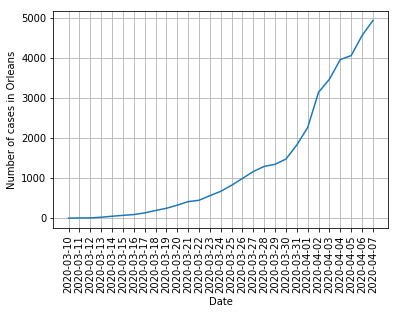

In [33]:
# Use your function to create a plot here
#code for inputing county, state, cases or deaths
countyInput = input("Ener a county: ")
stateInput = input("Enter a state: ")
dataInput = input("Enter cases or deaths: ")
xaxis, yaxis = countyData(county = countyInput, state = stateInput, data = dataInput)#code assigning specific data to x axis and y axis
#codes below will set up plot and label specific parts of graph
plt.figure()
plt.xlabel("Date") #what will show on the x axis
plt.ylabel("Number of {} in {}".format(dataInput,countyInput)) #what will show on the y axis
plt.xticks(rotation=90) #coding for 90 degree rotation of x axis
plt.grid(True) #code for adding a grid
plt.plot(xaxis, yaxis)
plt.show() #code to display plot